In [1]:
import pandas as pd
import numpy as np

In [3]:
name = 'heatF_tot_cd'
df = pd.read_csv('/home/ac_desktop/syncfiles/postproc_145/boundary_quantities_s02300.dat', names=['R','Z','theta',name])

df['X'] = df['R'] # * np.cos(df['theta'])
df['Y'] = df['theta'] # * np.sin(df['theta'])

is_regular_grid = (df.duplicated(['R','Z','theta']).sum() == 0)
print(f"是否规则网格数据: {is_regular_grid}") 



是否规则网格数据: True


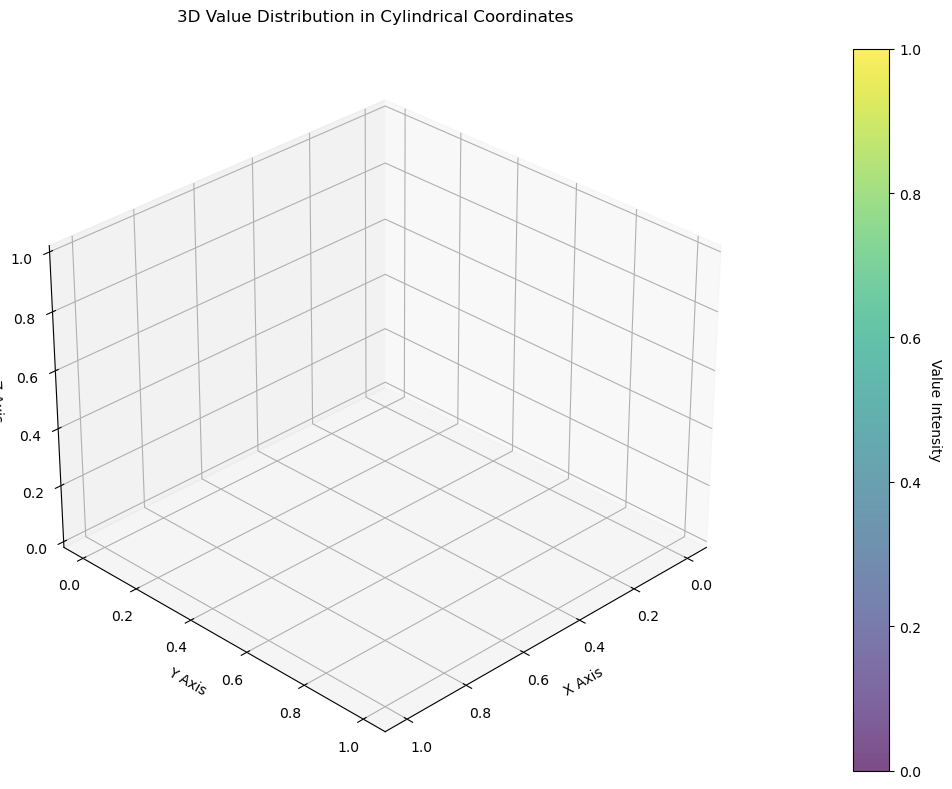

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('viridis')
norm = plt.Normalize(df[name].min(), df[name].max())

# 03D散点图+颜色映射

sc = ax.scatter(
    df['X'], df['Y'], df['Z'],
    c=df[name], 
    cmap=cmap,
    s=0.2,          # 点大小

    edgecolor='k', # 点边框

    alpha=0.7
)

# 添加颜色条

cbar = fig.colorbar(sc, pad=0.1)
cbar.set_label('Value Intensity', rotation=270, labelpad=15)

# 坐标轴设置

ax.set_xlabel('X Axis', fontsize=10)
ax.set_ylabel('Y Axis', fontsize=10)
ax.set_zlabel('Z Axis', fontsize=10)
ax.set_title('3D Value Distribution in Cylindrical Coordinates', pad=20)

# 优化显示角度

ax.view_init(elev=30, azim=45)
plt.tight_layout()
plt.show()

In [6]:
import plotly.graph_objects as go

# 生成颜色刻度条

colorscale = [[0, 'rgb(20,50,100)'], 
              [0.5, 'rgb(200,200,50)'],
              [1, 'rgb(250,50,50)']]

fig = go.Figure(data=go.Scatter3d(
    x=df['X'],
    y=df['Y'],
    z=df['Z'],
    mode='markers',
    marker=dict(
        size=5,
        color=df[name],
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(
            title='Value Scale',
            x=0.82  # 调整颜色条位置

        )
    ),
    hovertext=df[['R','Z','theta',name]].apply(
        lambda row: f"R:{row.R:.2f}<br>Z:{row.Z:.2f}<br>θ:{row.theta:.2f}<br>Value:{row.value:.2f}",
        axis=1
    )
))

# 增强场景设置

fig.update_layout(
    scene=dict(
        xaxis_title='X (R*cosθ)',
        yaxis_title='Y (R*sinθ)',
        zaxis_title='Z Axis',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=0.6)  # 调整初始视角

        )
    ),
    margin=dict(l=0, r=0, b=0, t=30),
    height=800
)

# 添加辅助网格线（可选）

fig.add_trace(go.Scatter3d(
    x=df['X'], y=df['Y'], z=df['Z'],
    mode='lines',
    line=dict(color='rgba(150,150,150,0.2)', width=1),
    showlegend=False
))

fig.show()

ModuleNotFoundError: No module named 'plotly'

In [7]:
from scipy.interpolate import griddata

# 创建规则网格

xi = np.linspace(df['X'].min(), df['X'].max(), 100)
yi = np.linspace(df['Y'].min(), df['Y'].max(), 100)
zi = np.linspace(df['Z'].min(), df['Z'].max(), 50)
Xg, Yg, Zg = np.meshgrid(xi, yi, zi)

# 三维插值

values_interp = griddata(
    (df['X'], df['Y'], df['Z']),
    df[name],
    (Xg, Yg, Zg),
    method='linear'
)


# 在Plotly中添加Z=const的剖面

z_slice = df['Z'].median()
slice_df = df[np.isclose(df['Z'], z_slice, atol=0.1)]

fig.add_trace(go.Scatter3d(
    x=slice_df['X'],
    y=slice_df['Y'],
    z=slice_df['Z'],
    mode='markers',
    marker=dict(color='red', size=8),
    name=f'Z={z_slice:.1f}剖面'
))

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U92'), dtype('float64')) -> None